In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_predict

# Regression with ML

As final goodbye (or is it a final FU?) we will use machine learning for a regression task, trying to estimate the mice's running activity from ther phenotype data. Our target will no longer be binary (CD/HFD) or even categorical, but continuous valued.

To help you get started quickly, we have added a few lines of code to create the target vector, and deleted all running-related phenotype measurements from the input, such as night-time running activity.

In [3]:
pheno = pd.read_csv('files/phenotype_cd_hfd.csv', index_col=0)
target = pheno['24hRun_ActivityWheel_[km]']

data = pheno.dropna(axis=1).drop(columns=['strain', '24hRun_ActivityWheel_[km]','DayRun_ActivityWheel_[km]','NightRun_ActivityWheel_[km]', 'Dist_post_[m]', 'Improvement_[meters]', 'Dist_pre_[m]'])
data['diet'] = data['diet'].replace('CD', 0).replace('HFD', 1)

Initialize a regressor, for example `SVR`. You can also use `RandomForestRegressor` or `KNeighborsRegressor`, they all have the same interface, and most code you write using them is interchangeable.

In [4]:
clf = SVR()
data2 = (data - data.mean())/data.std()
clf.fit(data2, target) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Fit and predict all data. Plot the target and predicted vectors against each other using `plt.scatter`.

Text(0,0.5,'Y')

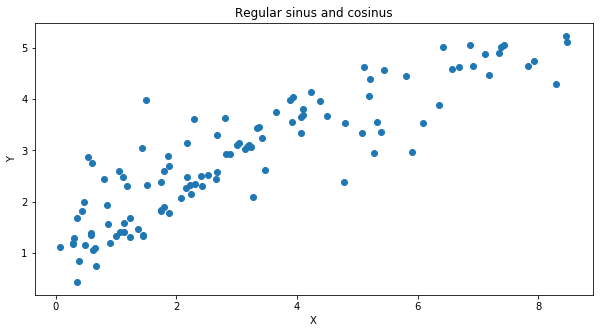

In [5]:
clf.predict(data2)

fig = plt.subplots(figsize=(10,5))
plot = plt.scatter(x = target,y = clf.predict(data2))
plt.title('Prediction of mice running data using a regressor')
plt.xlabel('X', fontsize= 10)
plt.ylabel('Y', fontsize= 10)
plt.show()

Perform a cross-validated prediction. "Scoring" as such doesn't make much sense with continuous variables, so just use `cross_val_predict` and present them on a scatter plot against the target values, similar to above. Is it disappointing, satisfactory, or something in between?

Calculate the standard error as a measure of accuracy. It's a one liner: the standard deviation of difference between the predicted and the actual values.

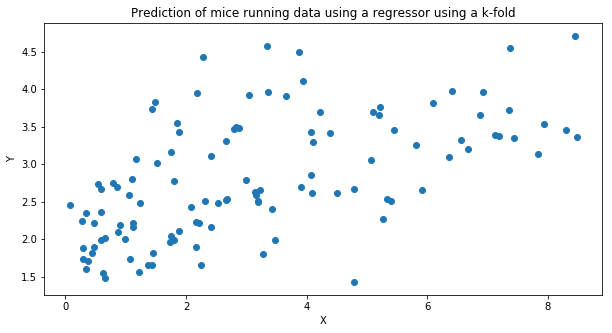

In [8]:
cv_probs = cross_val_predict(clf, data2, target, cv = KFold(3, shuffle=True))

fig = plt.subplots(figsize=(10,5))
plot = plt.scatter(x = target,y = cv_probs)
plt.title('Prediction of mice running data using a regressor using a k-fold')
plt.xlabel('X', fontsize= 10)
plt.ylabel('Y', fontsize= 10)
plt.show()

This is not good. Thus, if we compare this to the plot below, which is randomly generated it is still better.

In [9]:
#Standart error
std_error = (cv_probs - target)
np.sqrt(std_error.dot(std_error)/len(std_error))

1.9558635486513165

What should we compare this performance to? A random predictor could, for example, return a random value from the available target values. Create a scatter plot of what that would be like. Hint: use `np.random.choice`, select a 100 random values twice, and plot them against each other. What is the average standard error for the random predictor?

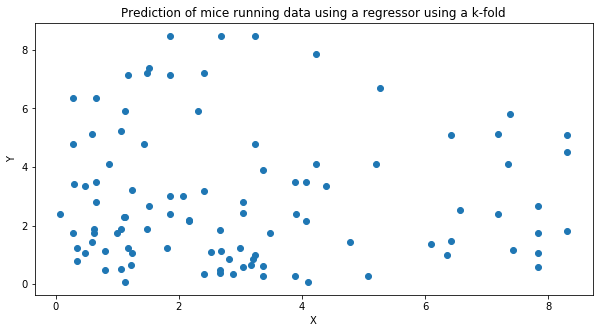

In [10]:
fig = plt.subplots(figsize=(10,5))
plot = plt.scatter(np.random.choice(target,100), np.random.choice(target,100))
plt.title('Random scatter plot')
plt.xlabel('X', fontsize= 10)
plt.ylabel('Y', fontsize= 10)
plt.show()

This is random.

Use a `RandomForestRegressor` to do the task (use at least 100 trees though), and check the most important features. Do they make sense? Take the top 20, and evaluate models that use an increasing amount of them. Did you find a sweet spot?

In [12]:
clf_rf = RandomForestRegressor(n_estimators=100)
clf_rf.fit(data2, target) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

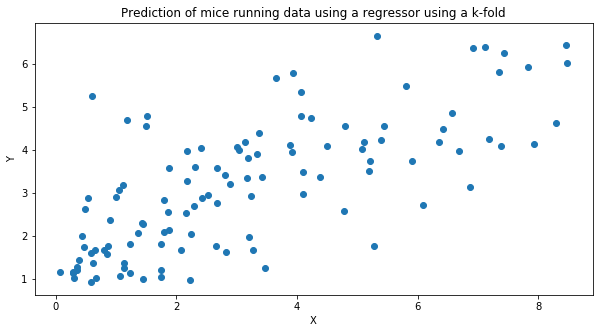

In [13]:
cv_probs_rf = cross_val_predict(clf_rf, data2, target, cv = KFold(3, shuffle=True))

fig = plt.subplots(figsize=(10,5))
plt.scatter(x = target,y = cv_probs_rf)
plt.title('Prediction of mice running data using a randomforest regressor')
plt.xlabel('X', fontsize= 10)
plt.ylabel('Y', fontsize= 10)
plt.show()

Seems like the randomforest regressor doesn't perform significantly better ...

In [14]:
features = pd.DataFrame(clf_rf.feature_importances_, index = data.columns)

features = features.sort_values(0, ascending=False)

features.head(20)

,0
BWLoss_AfterExercise_[%],0.457608
BodyWeight_Wk8_[g],0.067015
24hXYTot_TSE_[#/hr],0.060651
Gastrocnemius_[%],0.040146
NightXYTot_TSE_[#/hr],0.033506
BWGain_8-28Weeks_[%],0.028278
BodyWeight_postWheel_[g],0.025107
DayXYTot_TSE_[#/hr],0.024180
Kidney_[g],0.019704
BodyWeight_preCLAMS_[g],0.015335


In [28]:
features.nlargest(20, 0, keep='first')

,0
BWLoss_AfterExercise_[%],0.451515
24hXYTot_TSE_[#/hr],0.063371
BodyWeight_Wk8_[g],0.056151
NightXYTot_TSE_[#/hr],0.041161
DayXYTot_TSE_[#/hr],0.039839
Gastrocnemius_[%],0.026737
BWGain_8-28Weeks_[%],0.025459
Glucose0min_OGTT_[mg/dL],0.021665
BodyWeight_postWheel_[g],0.019871
Kidney_[g],0.017281


In [17]:
top20 = ['BWLoss_AfterExercise_[%]', '24hXYTot_TSE_[#/hr]', 'BodyWeight_Wk8_[g]', 'NightXYTot_TSE_[#/hr]', 'DayXYTot_TSE_[#/hr]', 'Gastrocnemius_[%]', 'BWGain_8-28Weeks_[%]', 'BWGain_8-28Weeks_[%]']
for i in range(1,20):
    cv_pred = cross_val_predict(clf_rf, data2.loc[:,top20[:i]], target, cv = KFold(3, shuffle=True))
    print(i, (cv_pred-target).std())

1 1.9957171601315293
2 1.5254655216354005
3 1.4367578885185839
4 1.424523349658583
5 1.3700937567747347
6 1.3406062700590688
7 1.4041903844718975
8 1.4446698683635641
9 1.4295950844266991
10 1.483749589099252
11 1.6136806251230376
12 1.317111778263272
13 1.2892856017438055
14 1.4083022241411567
15 1.3306425980129228
16 1.3544078107574096
17 1.3310030520257599
18 1.465128687605733
19 1.5109743449051611
